Import Dependencies

In [10]:
import warnings

warnings.filterwarnings('ignore')

In [11]:
import cv2
import numpy as np
import os 
from matplotlib import pyplot as plt
import time 
import mediapipe as mp

media pipe holistics

In [12]:
mp_holistic = mp.solutions.holistic  # media pipe holistic model 
mp_drawing = mp.solutions.drawing_utils # media pipe drawing utilities

In [13]:
def mediapipe_detection(image, model):
    # Convert the image from RGB to BGR for OpenCV processing
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Improve performance by making the image array non-writeable
    image.flags.writeable = False

    # Process the image with the MediaPipe model
    results = model.process(image)

    # Make the image array writeable again
    image.flags.writeable = True

    # Convert the image back to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Return the processed image and the results
    return image, results


In [33]:
# Define custom drawing styles
face_landmark_style = mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1)
face_connection_style = mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)

pose_landmark_style = mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4)
pose_connection_style = mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)

left_hand_landmark_style = mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4)
left_hand_connection_style = mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)

right_hand_landmark_style = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4)
right_hand_connection_style = mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)

In [38]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,landmark_drawing_spec=face_landmark_style,connection_drawing_spec=face_connection_style) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,landmark_drawing_spec=pose_landmark_style,connection_drawing_spec=pose_connection_style) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,landmark_drawing_spec=left_hand_landmark_style,connection_drawing_spec=left_hand_connection_style) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,landmark_drawing_spec=right_hand_landmark_style,connection_drawing_spec=right_hand_connection_style) # Draw right hand connections


In [65]:
import cv2

# Open the default camera (usually the webcam)
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open video stream or file")
    exit()

with mp_holistic.Holistic(min_detection_confidence= 0.5 , min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()  # Read a frame from the camera


        if not ret: 
            print("Error: Failed to capture image")
            break
        

        image , results = mediapipe_detection(frame, holistic)
        print(results)

        draw_landmarks(image,results)
        
        cv2.imshow('CV2 Feed', image)  # Display the frame in a window named 'CV2 Feed'
        
        # Check if 'q' key is pressed to break the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()  # Release the camera
    cv2.destroyAllWindows()  # Close all OpenCV windows



libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [66]:
results

mediapipe.python.solution_base.SolutionOutputs

In [67]:
len(results.face_landmarks.landmark)

468

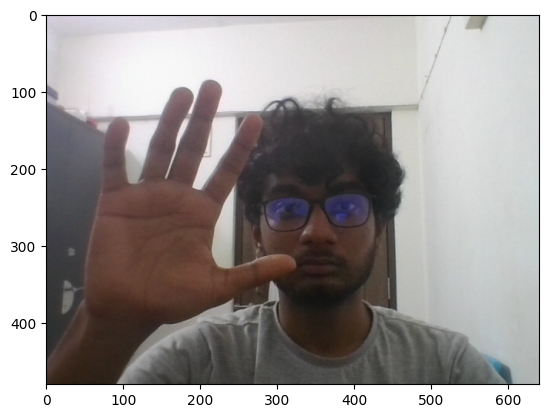

In [68]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [69]:
draw_landmarks(frame, results)

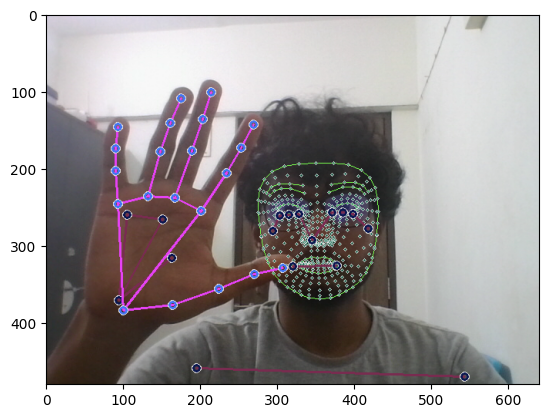

In [70]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

Extract the key point values

In [71]:
results

mediapipe.python.solution_base.SolutionOutputs

In [72]:
results.face_landmarks

landmark {
  x: 0.55148083
  y: 0.66
  z: -0.032115411
}
landmark {
  x: 0.550838053
  y: 0.612162
  z: -0.0540133
}
landmark {
  x: 0.551279128
  y: 0.627950549
  z: -0.0292674806
}
landmark {
  x: 0.541489482
  y: 0.564379334
  z: -0.0383559428
}
landmark {
  x: 0.550562143
  y: 0.597044289
  z: -0.0570310578
}
landmark {
  x: 0.55042541
  y: 0.577758074
  z: -0.0522253774
}
landmark {
  x: 0.550351202
  y: 0.530898452
  z: -0.021989394
}
landmark {
  x: 0.473147154
  y: 0.531257391
  z: 0.0175161175
}
landmark {
  x: 0.549741507
  y: 0.487957358
  z: -0.0133938314
}
landmark {
  x: 0.549467504
  y: 0.466168463
  z: -0.0146448221
}
landmark {
  x: 0.548252106
  y: 0.402272761
  z: -0.00183085015
}
landmark {
  x: 0.551558077
  y: 0.666929126
  z: -0.0309559256
}
landmark {
  x: 0.551835716
  y: 0.672511041
  z: -0.0275528
}
landmark {
  x: 0.552176118
  y: 0.675045192
  z: -0.0231502131
}
landmark {
  x: 0.552368939
  y: 0.679382861
  z: -0.0220807251
}
landmark {
  x: 0.552479863
  

In [73]:
results.face_landmarks.landmark

[x: 0.55148083
y: 0.66
z: -0.032115411
, x: 0.550838053
y: 0.612162
z: -0.0540133
, x: 0.551279128
y: 0.627950549
z: -0.0292674806
, x: 0.541489482
y: 0.564379334
z: -0.0383559428
, x: 0.550562143
y: 0.597044289
z: -0.0570310578
, x: 0.55042541
y: 0.577758074
z: -0.0522253774
, x: 0.550351202
y: 0.530898452
z: -0.021989394
, x: 0.473147154
y: 0.531257391
z: 0.0175161175
, x: 0.549741507
y: 0.487957358
z: -0.0133938314
, x: 0.549467504
y: 0.466168463
z: -0.0146448221
, x: 0.548252106
y: 0.402272761
z: -0.00183085015
, x: 0.551558077
y: 0.666929126
z: -0.0309559256
, x: 0.551835716
y: 0.672511041
z: -0.0275528
, x: 0.552176118
y: 0.675045192
z: -0.0231502131
, x: 0.552368939
y: 0.679382861
z: -0.0220807251
, x: 0.552479863
y: 0.684984505
z: -0.0238594133
, x: 0.552654445
y: 0.692419946
z: -0.026123995
, x: 0.552951276
y: 0.700080335
z: -0.0249266028
, x: 0.553636
y: 0.713754654
z: -0.0159188453
, x: 0.550982893
y: 0.620184422
z: -0.0490295328
, x: 0.542076945
y: 0.619946
z: -0.0352795534

In [74]:
len(results.face_landmarks.landmark)

468

In [75]:
len(results.pose_landmarks.landmark)

33

In [78]:
# error comes when there is no left hand in the picture captured
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [79]:
len(results.right_hand_landmarks.landmark)

21

In [81]:
face = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x, res.y, res.z])
    face.append(test)

In [56]:
# 468*3 = 1404 it has 3 directions x y z
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [60]:
face[:10]

array([ 0.51376998,  0.64044058, -0.02689241,  0.51138657,  0.60240054,
       -0.04297269,  0.51229042,  0.61542958, -0.02423501,  0.50225234])

In [82]:
# here we have 4 vars, x y z visibility so 33*4 = 132
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)


In [83]:
pose[:10]

array([ 0.54009992,  0.61052191, -0.96040708,  0.99990171,  0.58113205,
        0.53626126, -0.89837325,  0.99982321,  0.60299838,  0.5372377 ])

In [84]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)


In [85]:
lh[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [86]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [87]:
rh[:10]

array([ 1.57420635e-01,  8.01469803e-01,  7.78391495e-07,  2.57684290e-01,
        7.85952330e-01, -4.14269194e-02,  3.50869924e-01,  7.41985679e-01,
       -6.06250651e-02,  4.22367215e-01])

In [88]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [89]:
result_test = extract_keypoints(results)


In [90]:
result_test

array([ 0.54009992,  0.61052191, -0.96040708, ...,  0.14645284,
        0.30517623, -0.08668471])